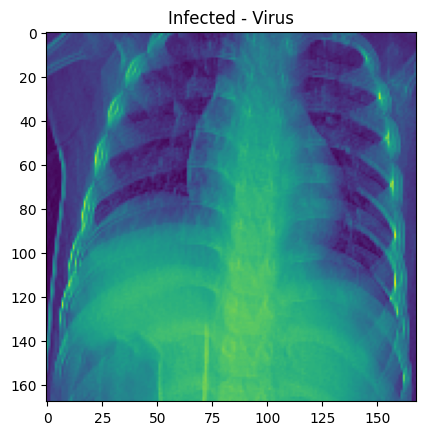

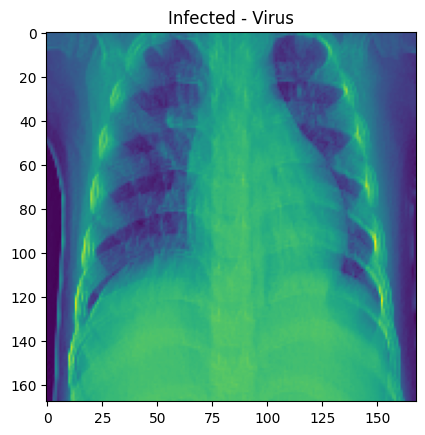

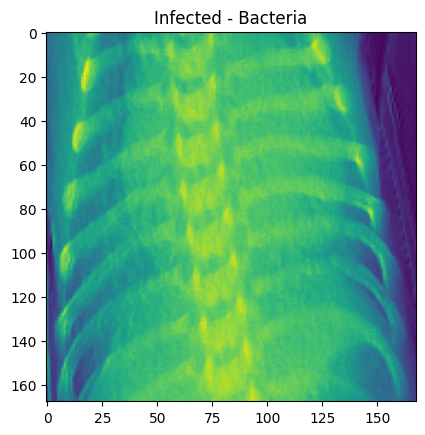

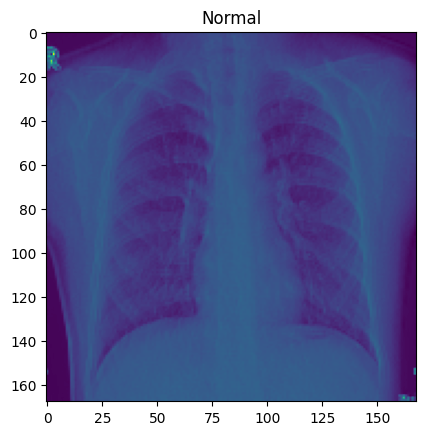

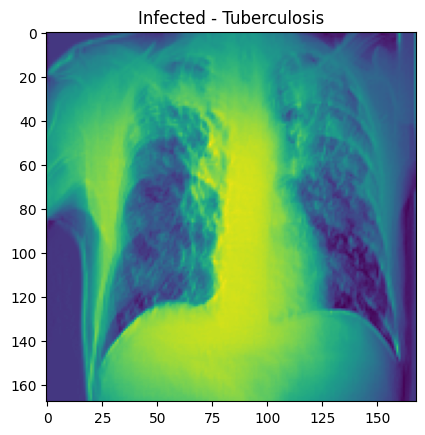

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

def visualize_heatmap(model, img_path, layer_name, title):
    # Image loading and preprocessing
    img = image.load_img(img_path, target_size=(170, 170))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.0

    # Get activations for a specified layer
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    activations = intermediate_layer_model(img_array)

    # Creating a Heat Map
    heatmap = tf.reduce_sum(activations, axis=-1)

    # Heat Map Normalization
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)

    # Visualization
    plt.imshow(heatmap[0], cmap='viridis')
    plt.title(title)
    plt.show()

img_path = 'C:/Users/User/Desktop/diploma/Dataset/All_check/person745_virus_1368.jpeg'
img_path2 = 'C:/Users/User/Desktop/diploma/Dataset/All_check/person734_virus_1355.jpeg'
img_path3 = 'C:/Users/User/Desktop/diploma/Dataset/All_check/BACTERIA-4330446-0001.jpeg'
img_path4 = 'C:/Users/User/Desktop/diploma/Dataset/All_check/NORMAL-6137647-0001.jpeg'
img_path5 = 'C:/Users/User/Desktop/diploma/Dataset/All_check/Tuberculosis-334.png'
layer_name = 'conv2d'

trained_model = tf.keras.models.load_model('C:/Users/User/Desktop/diploma/Models/final/best_final_model_weights.h5')

visualize_heatmap(trained_model, img_path, layer_name, "Infected - Virus")
visualize_heatmap(trained_model, img_path2, layer_name, "Infected - Virus")
visualize_heatmap(trained_model, img_path3, layer_name, "Infected - Bacteria")
visualize_heatmap(trained_model, img_path4, layer_name, "Normal")
visualize_heatmap(trained_model, img_path5, layer_name, "Infected - Tuberculosis")